In [9]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sn 
import numpy as np 
import joblib
from keras.models import load_model
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [10]:
df_slice = pd.read_csv('../Dataset/Normalisasi/processed_dataset_slice_norm.csv',sep=',')

In [11]:
lstm_model =  load_model('lstm_slice.h5')
lstm_model

In [12]:
naive_bayes_model = joblib.load('naive_bayes_final.pkl')
naive_bayes_model

GaussianNB(var_smoothing=0.732596542821523)

## Training Phase

In [13]:
slice_x = df_slice[df_slice.columns[:4]]
slice_y= df_slice['label']

slice_x.head(5)

,dst,src,Protocol,bytecount
0,0.647059,0.055556,0.0,0.000640
1,0.705882,0.333333,0.5,0.081254
2,0.882353,0.555556,0.0,0.000534
3,0.941176,0.833333,0.5,0.014585
4,0.647059,0.111111,1.0,0.618070


In [14]:
x_train,x_test,y_train,y_test = train_test_split(slice_x,slice_y,test_size=0.30,random_state=9)

x_train_awal = x_train
x_test_awal = x_test
y_train_awal = y_train
y_test_awal = y_test

x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_train.shape

(50540, 4, 1)

In [15]:
lstm_model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1580/1580 [==============================] - 9s 5ms/step - loss: 0.2407 - accuracy: 0.8717 - mean_squared_error: 0.4185 - mean_absolute_error: 0.5000
Epoch 2/10
1580/1580 [==============================] - 10s 6ms/step - loss: 0.2413 - accuracy: 0.8719 - mean_squared_error: 0.4180 - mean_absolute_error: 0.5000
Epoch 3/10
1580/1580 [==============================] - 11s 7ms/step - loss: 0.2359 - accuracy: 0.8745 - mean_squared_error: 0.4196 - mean_absolute_error: 0.5000
Epoch 4/10
1580/1580 [==============================] - 10s 6ms/step - loss: 0.2344 - accuracy: 0.8747 - mean_squared_error: 0.4205 - mean_absolute_error: 0.5000
Epoch 5/10
1580/1580 [==============================] - 10s 6ms/step - loss: 0.2337 - accuracy: 0.8762 - mean_squared_error: 0.4211 - mean_absolute_error: 0.5000
Epoch 6/10
1580/1580 [==============================] - 10s 6ms/step - loss: 0.2325 - accuracy: 0.8750 - mean_squared_error: 0.4211 - mean_absolute_error: 0.5000
Epoch 7/10
1580/1580 [=======

In [16]:
def calculate_precision(TP, FP):
    return TP/(TP+FP)


def calculate_fnr(TP, FP, FN):
    return FN/(TP+FP)

### Training Phase LSTM Result

In [17]:
y_pred_train = lstm_model.predict(x_train)
y_pred_train

array([[9.8971701e-01, 1.0282951e-02],
       [9.8877174e-01, 1.1228222e-02],
       [2.6472918e-08, 1.0000000e+00],
       ...,
       [1.0078259e-04, 9.9989915e-01],
       [1.3087399e-01, 8.6912602e-01],
       [1.9946144e-07, 9.9999976e-01]], dtype=float32)

In [20]:
y_pred_train_1 = [x[0] for x in y_pred_train]
y_pred_train_2 = [x[1] for x in y_pred_train]

y_pred_train_1[:10]

[0.989717,
 0.98877174,
 2.6472918e-08,
 0.10842895,
 0.9997634,
 0.019956594,
 0.989717,
 0.989717,
 0.3784829,
 1.0]

In [19]:
df_x_train = x_train_awal
df_x_train['lstm_result_1'] = y_pred_train_1
df_x_train['lstm_result_2'] = y_pred_train_2
df_x_train['label'] = y_train
df_x_train

C:\Users\user\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\user\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\user\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be se

,dst,src,Protocol,bytecount,lstm_result_1,lstm_result_2,label
52757,0.882353,0.000000,1.0,0.532565,9.897170e-01,1.028295e-02,0
28936,0.941176,0.111111,1.0,0.848030,9.887717e-01,1.122822e-02,0
17678,0.882353,0.555556,0.0,0.562899,2.647292e-08,1.000000e+00,1
54228,0.705882,0.111111,0.5,0.068673,1.084289e-01,8.915710e-01,0
16503,0.882353,0.166667,0.0,0.000123,9.997634e-01,2.365863e-04,0
...,...,...,...,...,...,...,...
42747,0.647059,0.111111,1.0,0.976527,3.656973e-01,6.343027e-01,1
22584,0.000000,0.888889,0.0,0.000423,1.000000e+00,1.480369e-09,0
65462,0.941176,0.055556,1.0,0.241881,1.007826e-04,9.998991e-01,1
66037,0.941176,0.722222,0.5,0.068629,1.308740e-01,8.691260e-01,0


In [22]:
y_test_pred = lstm_model.predict(x_test)
y_test_pred_1 = [x[0] for x in y_test_pred]
y_test_pred_2 = [x[1] for x in y_test_pred]

y_test_pred

array([[4.9616674e-01, 5.0383323e-01],
       [9.6575481e-01, 3.4245200e-02],
       [2.6060962e-11, 1.0000000e+00],
       ...,
       [1.0000000e+00, 1.2503669e-10],
       [8.5535225e-15, 1.0000000e+00],
       [1.0000000e+00, 2.3234208e-11]], dtype=float32)

In [23]:
df_x_test = x_test_awal
df_x_test['lstm_result_1'] = y_test_pred_1
df_x_test['lstm_result_2'] = y_test_pred_2
df_x_test['label'] = y_test
df_x_test

C:\Users\user\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\user\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\user\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be se

,dst,src,Protocol,bytecount,lstm_result_1,lstm_result_2,label
11713,0.764706,0.555556,1.0,0.477935,4.961667e-01,5.038332e-01,0
52924,0.647059,0.388889,0.5,0.105974,9.657548e-01,3.424520e-02,0
4045,0.647059,0.055556,0.0,0.826409,2.606096e-11,1.000000e+00,1
54476,0.294118,1.000000,0.0,0.000046,1.000000e+00,4.850069e-11,0
19341,0.647059,0.111111,1.0,0.977027,3.655823e-01,6.344177e-01,1
...,...,...,...,...,...,...,...
21721,0.176471,0.777778,0.0,0.000421,1.000000e+00,3.112136e-11,0
55392,0.941176,0.000000,1.0,0.717873,9.897170e-01,1.028295e-02,0
30108,0.941176,0.888889,0.0,0.000481,1.000000e+00,1.250367e-10,0
49565,0.176471,0.888889,0.0,0.263331,8.553523e-15,1.000000e+00,1


In [26]:
df_x_train.to_csv('data_latih_combined.csv', sep=',', index=False)
df_x_test.to_csv('data_test_combined.csv',sep=',', index=False)

### Naive Bayes Section

In [24]:
nb_classifier = joblib.load('naive_bayes_final.pkl')
nb_classifier

GaussianNB(var_smoothing=0.732596542821523)

In [27]:
df_train = pd.read_csv('data_latih_combined.csv', sep=',')
df_test = pd.read_csv('data_test_combined.csv', sep=',')

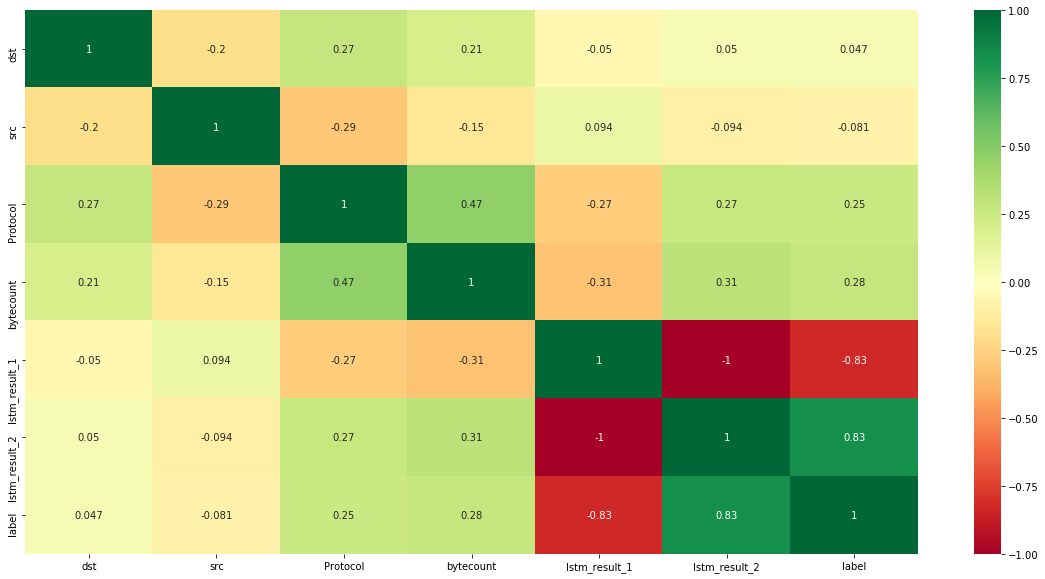

In [28]:
#Heatmap

fig = plt.figure(figsize=(20,10))
corrMatrix = df_train.corr()
sn.heatmap(corrMatrix,annot=True,cmap ='RdYlGn')
plt.show()

In [29]:
x_train = df_train[['Protocol', 'lstm_result_1','lstm_result_2']]
y_train = df_train['label']

x_test = df_test[['Protocol', 'lstm_result_1','lstm_result_2']]
y_test = df_test['label']

In [30]:
nb_classifier.fit(x_train, y_train)

GaussianNB(var_smoothing=0.732596542821523)

In [39]:
train_pred = nb_classifier.predict(x_train)
test_pred = nb_classifier.predict(x_test)

In [40]:
cm = confusion_matrix(y_train, train_pred, labels=[1,0])
TP = cm[0][0]
FP = cm[1][0]
FN = cm[0][1]
TN = cm[1][1]

print(cm)
print(classification_report(y_train, train_pred))
print("Accuracy:",accuracy_score(y_train, train_pred)*100)
print("Precision",(calculate_precision(TP,FP))*100)
print("False Negative Rate", (calculate_fnr(TP,FP,FN))*100)

[[17032  2719]
 [ 2955 27834]]
              precision    recall  f1-score   support

           0       0.91      0.90      0.91     30789
           1       0.85      0.86      0.86     19751

    accuracy                           0.89     50540
   macro avg       0.88      0.88      0.88     50540
weighted avg       0.89      0.89      0.89     50540

Accuracy: 88.77324891175307
Precision 85.21539000350228
False Negative Rate 13.603842497623456


In [41]:
cm = confusion_matrix(y_test, test_pred, labels=[1,0])
TP = cm[0][0]
FP = cm[1][0]
FN = cm[0][1]
TN = cm[1][1]

print(cm)
print(classification_report(y_test, test_pred))
print("Accuracy:",accuracy_score(y_test, test_pred)*100)
print("Precision",(calculate_precision(TP,FP))*100)
print("False Negative Rate", (calculate_fnr(TP,FP,FN))*100)

[[ 7189  1242]
 [ 1353 11877]]
              precision    recall  f1-score   support

           0       0.91      0.90      0.90     13230
           1       0.84      0.85      0.85      8431

    accuracy                           0.88     21661
   macro avg       0.87      0.88      0.87     21661
weighted avg       0.88      0.88      0.88     21661

Accuracy: 88.01994367757722
Precision 84.16061812221962
False Negative Rate 14.539920393350503
